<a href="https://colab.research.google.com/github/StephanyChanelo/IntroduccionCienciasPlanetarias/blob/main/Python_for_astronomers2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python para ciencias espaciales**
## ENES, Unidad Morelia
### Introducción a las ciencias planetarias

#**Funciones en Python**

**Las funciones son bloques de código que se pueden reutilizar simplemente llamando a la función. Esto permite la reutilización de código simple y elegante sin volver a escribir explícitamente secciones de código.**

En Python, la definición de funciones se realiza mediante la instrucción def más un nombre de función descriptivo. Una función, no es ejecutada hasta tanto no sea invocada. Para invocar una función, simplemente se la llama por su nombre:

In [ ]:
def mi_funcion(): 
    print("Hola Mundo") 


In [ ]:
mi_funcion()

Hola Mundo


Cuando una función, haga un retorno de datos, éstos, pueden ser asignados a una variable:

In [ ]:
def funcion(): 
  x = "Hola Mundo"

  return x


In [ ]:
x = funcion()
x

'Hola Mundo'

Un parámetro es un valor que la función espera recibir cuando sea llamada, a fin de ejecutar acciones en base al mismo. Una función puede esperar uno o más parámetros (que irán separados por una coma) o ninguno. Los parámetros que una función espera, serán utilizados por ésta, dentro de su algoritmo, a modo de variables de ámbito local. 

In [ ]:
def mi_funcion(nombre, apellido): 
  saludo = "Hola " + nombre + " " + apellido
  return saludo

In [ ]:
mi_funcion("Super", "Nova")

'Hola Super Nova'

En Python, también es posible, asignar valores por defecto a los parámetros de las funciones. Esto significa, que la función podrá ser llamada con menos argumentos de los que espera:

In [ ]:
def saludar(nombre, mensaje='Hola'): 
    print(mensaje, nombre) 

In [ ]:
for i in range(6):
  saludar("Adie")

Hola Adie
Hola Adie
Hola Adie
Hola Adie
Hola Adie
Hola Adie


Una vez definida la función existe en nuestro espacio de nombres, por lo tanto podemos usarla en otras funciones que definamos después.

In [ ]:
def saludarx(i):
  for i in range(i):
    saludar("Adie")

In [ ]:
saludarx(3)

Hola Adie
Hola Adie
Hola Adie


**TU TURNO: CREA UNA FUNCIÓN QUE SALUDE A TODOS TUS COMPAÑEROS**

#**Simulación de órbitas usando las Leyes de Kepler**

Simularemos órbitas e se analizará cómo cambiar la masa, la separación y la excentricidad cambia la forma de la órbita. Johannes Kepler (1571 - 1630) formuló tres leyes que describen el movimiento planetario.

* Ley #1 de Kepler: Todos los planetas se mueven en órbitas elípticas, con el sol en un foco. El lugar donde reside un planeta en cualquier momento de su órbita se puede especificar por el ángulo que forma el planeta con el semieje mayor.

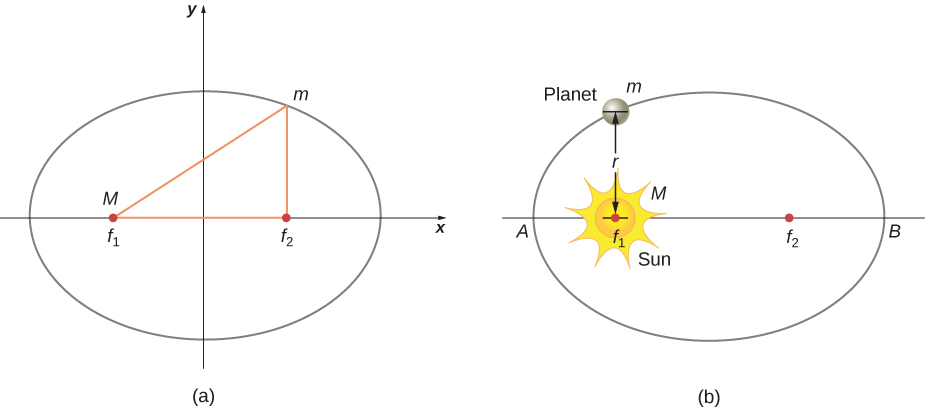

* Ley #2 de Kepler: Una línea que conecta un planeta con el sol barre áreas iguales en tiempos iguales.

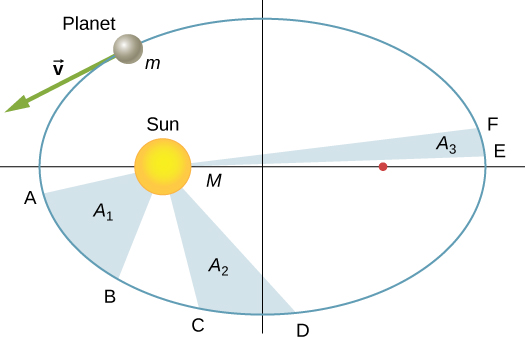

* Ley #3 de Kepler: El cuadrado del período de cualquier planeta es proporcional al cubo del semieje mayor de su órbita.

\begin{equation}
T^{2}=\frac{4π^{2}}{GM}a^{3}
\end{equation}

Definición de constantes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Constantes
G = 6.67384*10**(-11.0)
Msun = 1.9891*10**30.0
seconds_in_day = 86400.0
seconds_in_hour = 3600.0
seconds_in_year = 3.15569*10**7.0
day_in_year = 365.242
hours_in_day = 24.0
meters_in_AU = 1.496*10**11.0
pi = np.pi

La primera función utiliza la tercera ley de Kepler para convertir entre semieje mayor y período orbital. La tercera ecuación resuelve para cada punto en una órbita; esto se puede usar para graficar la órbita.

\begin{equation}
T^{2}=\alpha \, a^{3}
\end{equation}

\begin{equation}
a^{3} \, = \, \frac{T^{2}}{α} \\
a = \sqrt[3]{\frac{T^{2}}{\alpha}}
\end{equation}

In [ ]:
def keplerIII_period_to_majorsemiaxis(p_orb):
    alpha = (4*pi**2)/(G*Msun)
    a_cubed = (p_orb**2)/alpha
    a = a_cubed**(1./3.)
    
    return a

Información del cálculo de la órbita: http://www.nssc.ac.cn/wxzygx/weixin/201607/P020160718380095698873.pdf

Matemáticamente, la distancia entre un cuerpo central y un cuerpo en órbita se puede expresar como:

\begin{equation}
r(θ) = \frac{a(1-e^{2})}{1+ecos(θ)}
\end{equation}


donde:

* r: distancia 
* a: semieje mayor
* e: excentricidad
* θ: anomalia verdadera

En mecánica celeste, la anomalía verdadera es un parámetro angular que define la posición de un cuerpo que se mueve a lo largo de una órbita kepleriana. 

![angle of true anomaly](https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-1-4614-5444-1_16/MediaObjects/300437_1_En_16_Figa_HTML.gif)

\begin{equation}
θ = 2 arctan(\sqrt{\frac{1+e}{1-e}}tan(\frac{E}{2}))
\end{equation}

donde:

* E: Anomalía de excentricidad

Y la relación entre estas dos está dada por la ecuación de Kepler:

\begin{equation}
E = M + e \, sen(E)
\end{equation}

donde:

* M: Anomalía media


\begin{equation}
M \, \alpha \, \frac{2πt}{T} \\ 
\end{equation}


In [ ]:
def make_kepler_orbit(e,p_orb):
    nStep = 500
    tRange = np.linspace(0,p_orb,nStep)
    
    theta = []
    for time in tRange:
        nHalfPorb = int(2*(time-1)/p_orb)
        PsiDiff = 1
        M = 2*np.pi*time/p_orb
        PsiOld = M
        theta0old = 180.0
        while PsiDiff > 1e-10:
        #print PsiDiff, PsiOld, e*math.sin(PsiOld)
            PsiNew = M + e*np.sin(PsiOld)
            PsiDiff = PsiNew-PsiOld
            PsiOld = PsiNew
        theta0 = 2*np.arctan(((1+e)/(1-e))**(0.5)*np.tan(PsiOld/2.))
        theta.append(theta0)        
    return theta




Recordando que para realizar un plot debemos especificar los valores de x y y, esto se puede obtener a partir de la siguiente ecuación:

\begin{equation}
r(θ) = \frac{a(1-e^{2})}{1+ecos(θ)}
\end{equation}

In [ ]:
def orbit(a,e,true_anomaly): 
    
    rorbit = a*(1 - e**2)/(1 + e*np.cos(true_anomaly))
    xorbit = rorbit*np.cos(true_anomaly)
    yorbit = rorbit*np.sin(true_anomaly)
     
    
    return xorbit,yorbit

In [ ]:
def show_orbit(x, y, title, color1, color2):
  plt.title(title)
  # The Sun is located at the origin.
  plt.scatter(0,0, color=color1)
  plt.scatter(xOrbit,yOrbit, color=color2)
  plt.axis('equal')
  plt.xlabel('x position [au]')
  plt.ylabel('y position [au]')
  plt.show()


**Calculando la óribta terrestre**

In [ ]:
orbital_period = 1.0
eccentricity = 0.02

1. Obtener el vector de anomalias reales

In [ ]:
true_anomaly_vector = make_kepler_orbit(eccentricity,orbital_period)

2. Obtener el semieje mayor

In [ ]:
a = keplerIII_period_to_majorsemiaxis(orbital_period)

3. Obtener los valores x y y de la órbita

In [ ]:
xOrbit, yOrbit = orbit(a,eccentricity,true_anomaly_vector)

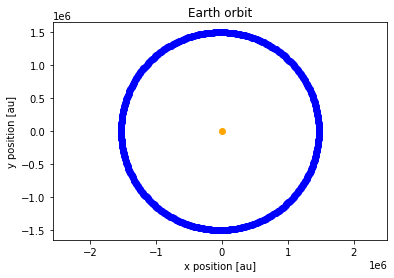

In [ ]:
show_orbit(xOrbit, yOrbit, 'Earth orbit', 'orange', 'blue')

**EJERCICIO: 1. Calcula la órbita de tu planeta favorito**

Aquí hay información sobre los planetas que pueden ayudarte a calcular las órbitas:

```
Planet = Mercury, Mass = 1.7 × 10^(-7) solar mass, orbital period = 0.48 years, eccentricity = 0.21
Planet = Venus, Mass = 2.6 × 10^(-6) solar mass, orbital period = 0.62 years, eccentricity = 0.01
Planet = Mars, Mass = 3.2 × 10^(-7) solar mass, orbital period = 1.88 years, eccentricity = 0.09
Planet = Jupiter, Mass = 9.5 × 10^(-4) solar mass, orbital period = 11.86 years, eccentricity = 0.05
Planet = Saturn, Mass = 2.9 × 10^(-4) solar mass, orbital period = 29.46 years, eccentricity = 0.05
Planet = Uranus, Mass = 4.5 × 10^(-5) solar mass, orbital period =84.02 years, eccentricity = 0.05
Planet = Neptune, Mass = 5.2 × 10^(-5) solar mass, orbital period = 164.8 years, eccentricity = 0.01
Planet = Pluto, Mass = 6.6 × 10^(-9) solar mass, orbital period = 248.0 years, eccentricity = 0.25
```

#**Órbitas de cometas**

Este conjunto de datos contiene los siguientes campos:

* Objeto: el nombre del cometa
* Época: la época del cometa, en TDB
* TP: tiempo de paso del perihelio, en TDB; este es el momento en que el cometa estaba más cerca del sol
* e: la excentricidad orbital del cometa
* i: Inclinación de la órbita con respecto al plano de la eclíptica y el equinoccio de J2000 (J2000-Eclíptica), en grados
* w: Argumento del perihelio (J2000-Eclíptica), en grados
* Nodo: Longitud del nodo ascendente (J2000-Eclíptica), en grados
* q: distancia del cometa en el perihelio, en AU
* P: distancia del cometa al afelio, en AU
* P: período orbital, en años julianos
* A1: parámetro de fuerza no gravitacional A1
* A2: parámetro de fuerza no gravitacional A2
* A3: parámetro de fuerza no gravitacional A3
* MOID (AU): distancia mínima de intersección de la órbita (la distancia mínima entre las órbitas osculantes del NEO y la Tierra)
* ref: referencia solución orbital

In [ ]:
import pandas as pd
# Read in data that will be used for the calculations.
pd_data = pd.read_csv("https://raw.githubusercontent.com/StephanyChanelo/IntroduccionCienciasPlanetarias/main/Data/near-earth-comets.csv")


In [ ]:
pd_data.head(10)

,Object,Epoch,TP,e,i,w,Node,q,Q,P,MOID,A1,A2,A3,DT,ref,Object_name
0,1P/Halley,49400,2446467.395,0.967143,162.262691,111.332485,58.420081,0.585978,35.08,75.32,0.063782,2.700000e-10,1.550000e-10,NaN,NaN,J863/77,1P/Halley
1,2P/Encke,56870,2456618.204,0.848268,11.779995,186.540346,334.569806,0.336092,4.09,3.30,0.173092,1.580000e-10,-5.050000e-12,NaN,NaN,74,2P/Encke
2,3D/Biela,-9480,2390514.115,0.751299,13.216400,221.658800,250.669000,0.879073,6.19,6.65,0.000518,3.900000e-09,-2.540000e-10,NaN,NaN,IAUCAT03,3D/Biela
3,5D/Brorsen,7440,2407439.534,0.809796,29.382100,14.946800,102.967600,0.589847,5.61,5.46,0.366559,1.270000e-08,1.340000e-09,NaN,NaN,IAUCAT03,5D/Brorsen
4,7P/Pons-Winnecke,56981,2457053.028,0.637528,22.335015,172.506161,93.416327,1.239215,5.60,6.32,0.224191,7.860000e-11,-1.150000e-11,-1.530000e-10,131.0,K088/14,7P/Pons-Winnecke
5,8P/Tuttle,54374,2454492.526,0.819800,54.983185,207.509246,270.341652,1.027117,10.37,13.61,0.095310,6.890000e-10,1.370000e-10,-4.590000e-10,NaN,K074/27,8P/Tuttle
6,12P/Pons-Brooks,35000,2434885.381,0.954812,74.176894,199.028469,255.891144,0.773667,33.47,70.85,0.187300,-1.020000e-09,-2.710000e-10,NaN,NaN,15,12P/Pons-Brooks
7,13P/Olbers,35760,2435643.635,0.930297,44.609886,64.641207,86.103128,1.178451,32.64,69.52,0.477199,9.450000e-09,6.490000e-10,NaN,NaN,10,13P/Olbers
8,15P/Finlay,57003,2457018.557,0.720184,6.798913,347.552839,13.778147,0.975901,6.00,6.51,0.009433,4.080000e-09,6.650000e-11,NaN,NaN,K085/14,15P/Finlay
9,18D/Perrine-Mrkos,40240,2440162.042,0.642581,17.758983,166.050417,240.875547,1.272248,5.85,6.72,0.289230,NaN,NaN,NaN,NaN,J682/18,18D/Perrine-Mrkos


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

**Astropy**


El Proyecto Astropy es un esfuerzo de la comunidad para desarrollar un paquete central común para Astronomía en Python y fomentar un ecosistema de paquetes de astronomía.

Para más información: https://www.astropy.org/

In [ ]:
pip install PyAstronomy

In [ ]:
from PyAstronomy import pyasl

In [ ]:
dat = [['Earth',1,1,1,0,0,0,0],['Jupiter',5.203,5.203,12,0,0,0,0],['Neptune',30.047,30.047,165,0,0,0,0]]
planets = pd.DataFrame( dat,columns=['Object','Q','q','P','e','O','i','Node'])
planets

,Object,Q,q,P,e,O,i,Node
0,Earth,1.000,1.000,1,0,0,0,0
1,Jupiter,5.203,5.203,12,0,0,0,0
2,Neptune,30.047,30.047,165,0,0,0,0


**pyasl.KeplerEllipse(a, per, e=0, tau=0, Omega=0, w=0, i=0, ks)**

* a = Semi eje mayor
* per = Periodo orbital
* tau = Tiempo de paso del periapsis/afelio (opcional)
* omega = longitud del nodo ascendente (opcional)
* w = La longitud de periapsis está dada por omega+w (opcional)
* i = Inclinación orbital (opcional)
* ks = Solución a la ecuación de Kepler (default)

Permite calcular la órbita segun las encuaciones de Kepler.

Para más información: https://pyastronomy.readthedocs.io/en/latest/pyaslDoc/aslDoc/keplerOrbitAPI.html

In [ ]:
def get_kepler(comet,scale):
  ke = pyasl.KeplerEllipse((comet.Q+comet.q)/2,per=comet.P, e=comet.e, Omega=comet.Node , i=comet.i, w=0.0)
  t = np.linspace(0, scale, 2000)
  pos = ke.xyzPos(t) 
  return pos

def show(pd_comet,scale):
  x = np.array([])
  y = np.array([])
  z = np.array([])

  fig = plt.figure()
  fig.set_size_inches(8, 8.0)  #
  ax = fig.gca(projection='3d')
  ax = Axes3D(fig)
  
  #PLANETAS
  for a in range(0,planets.shape[0]): 
    pos = get_kepler( planets.iloc[a],scale)
    x =  pos[:,0]  
    z=  pos[:,2]
    y =   pos[:,1]
    ax.plot(xs=x, ys=y, zs=z, zdir='z', label='ys=0',color='r',markersize=10) 

   #COMETA 
  for x in range(0,pd_comet.shape[0]): 
    pos = get_kepler( pd_comet.iloc[x],scale)
    mpl.rcParams['legend.fontsize'] = 10

      
    x =  pos[:,0]  
    z=  pos[:,2]
    y =   pos[:,1]

    ax.plot(xs=x, ys=y, zs=z, zdir='z', label='ys=0',color='b',markersize=10)
    plt.plot([0], [0],[0], 'k+', markersize=100,color ='b')
    
  

  plt.show()    

**Cometas tipo Halley (con Neptuno y Júpiter en rojo)**
* Periodo entre 20 y 200 años. 
* Muy inclinado a la eclíptica.
* Se piensa que se han roto trozos de la nube de Oort

(24, 17)


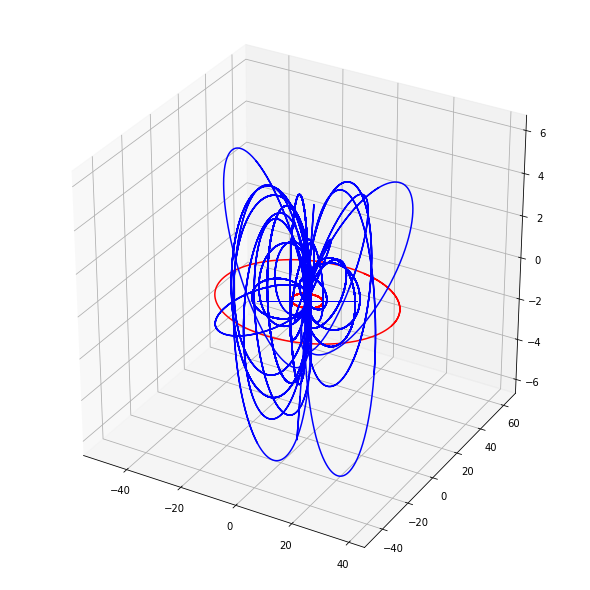

In [ ]:
res = pd_data[  (pd_data['P']>20)& (pd_data['P']<200) ]
print (res.shape)
show(res,200)

**Algunas distancias útiles**

* Mercurio: 0.387 AU
* Venus: 0,723 AU
* Tierra: 1.000 AU
* Marte: 1.524 AU
* Júpiter: 5.203 AU
* Saturno: 9.582 AU
* Urano: 19.201 AU
* Neptuno: 30.047 AU
* Cinturón de Kuiper 30-50 AU
* Nube de Oort 50.000-200.000 AU

In [ ]:
mercury = 0.387
Venus= 0.723 
  
print ('number of commets that pass inside mercury:',len( pd_data[pd_data.q < mercury ]) )

number of commets that pass inside mercury: 11


**EJERCICIO: 2. Plotea las órbitas de los objetos con mayor riesgo de colisión terrestre.**

* Hint:  Distancia mínima de intersección orbital. El cometa Swift – Tuttle ha sido descrito como "el objeto más peligroso conocido por la humanidad".
Nombre del objeto en la base de datos = 109P/Swift-Tuttle

**3. Calcula el número de cometas que pasan entre Júpiter y Saturno**

**4. Plotea la órbita del cometa Halley**

**Referencias:**



1.   Curtis, H., 2005, Orbital Mechanics for
Engineering Students, ELSEVIER. http://www.nssc.ac.cn/wxzygx/weixin/201607/P020160718380095698873.pdf
2.   Murray, C. D. & Dermott, S. F., 1999, Solar System Dynamics, Cambridge University Press, Cambridge.
3. Plummer, H. C., 1960, An Introductory Treatise on Dynamical Astronomy, Dover Publications, New York.

